In [1]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

               x   y      Size  Food Availability
Step AgentID                                     
0    0        18  26  0.500000                0.8
     1        28   4  0.500000                0.8
     2         8   8  0.500000                0.8
     3        13  11  0.500000                0.8
     4        30   6  0.500000                0.8
...           ..  ..       ...                ...
49   95       42  43  0.822206                0.8
     96       26  40  0.822206                0.8
     97       49  18  0.822206                0.8
     98       29  24  0.822206                0.8
     99       30  33  0.822206                0.8

[5000 rows x 4 columns]


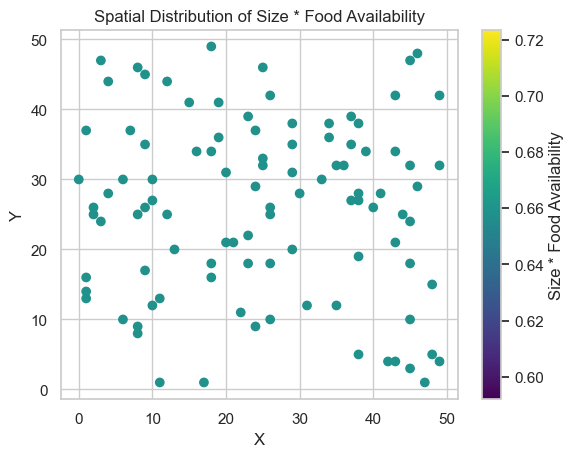

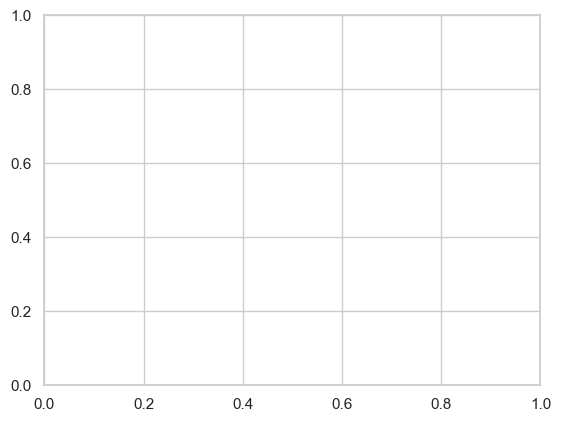

In [15]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Creature(Agent):
    def __init__(self, unique_id, model, traits=None, environmental_factors=None, mutation_rate=0.1):
        super().__init__(unique_id, model)
        
        # Initialize traits based on user input or defaults
        self.traits = traits if traits is not None else {"feature1": model.random.random()}
        
        # Initialize environmental factors based on user input or defaults
        self.environmental_factors = environmental_factors if environmental_factors is not None else {"factor1": model.random.uniform(0, 1)}
        
        # Mutation rate for traits
        self.mutation_rate = mutation_rate

    def step(self):
        # Example: Update feature1 based on factor1 with mutation
        mutation = self.model.random.random() < self.mutation_rate
        mutation_factor = self.model.random.uniform(-0.1, 0.1) if mutation else 0.0
        self.traits["feature1"] += 0.1 * (self.environmental_factors["factor1"] - self.traits["feature1"]) + mutation_factor
        self.traits["feature1"] = max(0, min(1, self.traits["feature1"]))

class EvolutionModel(Model):
    def __init__(self, N_agents, width, height, initial_traits=None, initial_environmental_factors=None):
        self.num_agents = N_agents
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        
        # Create agents with custom initial traits and environmental factors
        for i in range(self.num_agents):
            agent = Creature(i, self, traits=initial_traits, environmental_factors=initial_environmental_factors)
            x = np.random.choice(self.grid.width)
            y = np.random.choice(self.grid.height)
            self.grid.place_agent(agent, (x, y))
            self.schedule.add(agent)

        # DataCollector to track traits and environmental factors over time
        self.datacollector = DataCollector(agent_reporters={"x": lambda a: a.pos[0], 
                                                            "y": lambda a: a.pos[1],
                                                            "Feature1": lambda a: a.traits["feature1"],
                                                            "Factor1": lambda a: a.environmental_factors["factor1"]})

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Example of creating a model with specific traits and environmental factors
initial_traits = {"feature1": 0.5}
initial_factors = {"factor1": 0.8}
N_agents = 100
width = 50
height = 50

model = EvolutionModel(N_agents, width, height, initial_traits=initial_traits, initial_environmental_factors=initial_factors)

# Run the model for a certain number of steps
N_steps = 50
for i in range(N_steps):
    model.step()

# Extract and visualize data collected during the simulation
agent_data = model.datacollector.get_agent_vars_dataframe()
print(agent_data)

# Visualize the spatial distribution of traits and environmental factors in the last step
last_step_data = agent_data.xs(N_steps - 1, level="Step")

for trait in ["Feature1"]:
    fig, ax = plt.subplots()
    sc = ax.scatter(last_step_data["y"], last_step_data["x"],
                    c=last_step_data[trait].values * last_step_data["Factor1"].values,
                    cmap='viridis')
    plt.colorbar(sc, label=f'{trait} * Factor1')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Spatial Distribution of {trait} * Factor1')
    plt.show()

# Create an animation
fig, ax = plt.subplots()
def update(i):
    ax.clear()
    step_data = agent_data.xs(i, level="Step")
    if i < len(step_data.columns):
        sc_local = ax.scatter(step_data["y"], step_data["x"],
                        c=step_data.iloc[:, i].values * step_data["Factor1"].values,
                        cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Spatial Distribution of Trait at Step {i}')
    else:
        print(f"No column {i} in the DataFrame")

ani = FuncAnimation(fig, update, frames=N_steps, repeat=True)
plt.show()


In [14]:
import seaborn as sns  # Optional, for better style

# Set seaborn style, optional but makes plots look nicer
sns.set(style="whitegrid")

# Plotting the traits over time
for trait in range(num_traits):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="x", y="y", hue="Traits", data=agent_data.xs(trait, level="AgentID"), palette="viridis", legend="full")
    plt.title(f"Trait {trait + 1} Distribution Over Time")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Plotting the environment factor over time
plt.figure(figsize=(10, 6))
sns.scatterplot(x="x", y="y", hue="Environment Factor", data=agent_data, palette="viridis", legend="full")
plt.title("Environment Factor Distribution Over Time")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

TypeError: unhashable type: 'list'

<Figure size 1000x600 with 0 Axes>